In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
!pip install opendatasets

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import opendatasets as od

In [4]:
od.download("https://www.kaggle.com/datasets/kkhandekar/electric-vehicles-india")

Skipping, found downloaded files in ".\electric-vehicles-india" (use force=True to force download)


In [23]:
df=pd.read_csv("electric-vehicles-india/EVIndia.csv")
df

,Car,Style,Range,Transmission,VehicleType,PriceRange,Capacity,BootSpace,BaseModel,TopModel
0,Tata Nexon EV,Compact SUV,312 Km/Full Charge,Automatic,Electric,₹ 13.99 - 17.4 L,5 Seater,350 L,XM,Dark XZ Plus LUX
1,Tata Tigor EV,Subcompact Sedan,306 Km/Full Charge,Automatic,Electric,₹ 12.49 - 13.64 L,5 Seater,316 L,XE,XZ Plus Dual Tone
2,Tata Nexon EV Max,Compact SUV,437 Km/Full Charge,Automatic,Electric,₹ 17.74 - 19.24 L,5 Seater,350 L,XZ Plus 3.3 kW,XZ Plus Lux 7.2 kW
3,MG ZS EV,Compact SUV,419 Km/Full Charge,Automatic,Electric,₹ 21.99 - 25.88 L,5 Seater,448 L,Excite,Exclusive
4,Hyundai Kona Electric,Compact SUV,452 Km/Full Charge,Automatic,Electric,₹ 23.79 - 23.98 L,5 Seater,na,Premium Dual Tone,HSE
5,Jaguar I-Pace,Premium Midsize Sedan,470 Km/Full Charge,Automatic,Electric,₹ 1.06 - 1.12 Cr,5 Seater,656 L,S,Sportback 55
6,Audi E-Tron GT,Premium Coupe,388 Km/Full Charge,Automatic,Electric,₹ 1.8 Cr,5 Seater,405 L,Quattro,na
7,BYD E6,Subcompact MPV,415 Km/Full Charge,Automatic,Electric,₹ 29.15 L,5 Seater,580 L,STD,na
8,Mercedes-Benz EQC,Compact SUV,471 Km/Full Charge,Automatic,Electric,₹ 1 Cr,5 Seater,na,na,na
9,BMW iX,Premium Fullsize SUV,425 Km/Full Charge,Automatic,Electric,₹ 1.16 Cr,5 Seater,na,na,na


## Preprocessing

In [24]:
def Preprocess1(df,old_col):
#     old_col=old_col[0]
    df[old_col]=df[old_col].replace("na","0 L")
    bootspace=df[old_col].str.split("L",n=1,expand=True)
    df[old_col+"_new"]=bootspace[0]
    df[old_col+"_new"]=df[old_col+"_new"].astype(int)
    df[old_col+"_new"].mean()
    df[old_col+"_new"]=df[old_col+"_new"].replace(0,df["BootSpace_new"].mean())
    df=pd.DataFrame(df)
    return df     

In [25]:
df=Preprocess1(df,"BootSpace")
df

,Car,Style,Range,Transmission,VehicleType,PriceRange,Capacity,BootSpace,BaseModel,TopModel,BootSpace_new
0,Tata Nexon EV,Compact SUV,312 Km/Full Charge,Automatic,Electric,₹ 13.99 - 17.4 L,5 Seater,350 L,XM,Dark XZ Plus LUX,350.00
1,Tata Tigor EV,Subcompact Sedan,306 Km/Full Charge,Automatic,Electric,₹ 12.49 - 13.64 L,5 Seater,316 L,XE,XZ Plus Dual Tone,316.00
2,Tata Nexon EV Max,Compact SUV,437 Km/Full Charge,Automatic,Electric,₹ 17.74 - 19.24 L,5 Seater,350 L,XZ Plus 3.3 kW,XZ Plus Lux 7.2 kW,350.00
3,MG ZS EV,Compact SUV,419 Km/Full Charge,Automatic,Electric,₹ 21.99 - 25.88 L,5 Seater,448 L,Excite,Exclusive,448.00
4,Hyundai Kona Electric,Compact SUV,452 Km/Full Charge,Automatic,Electric,₹ 23.79 - 23.98 L,5 Seater,0 L,Premium Dual Tone,HSE,313.75
5,Jaguar I-Pace,Premium Midsize Sedan,470 Km/Full Charge,Automatic,Electric,₹ 1.06 - 1.12 Cr,5 Seater,656 L,S,Sportback 55,656.00
6,Audi E-Tron GT,Premium Coupe,388 Km/Full Charge,Automatic,Electric,₹ 1.8 Cr,5 Seater,405 L,Quattro,na,405.00
7,BYD E6,Subcompact MPV,415 Km/Full Charge,Automatic,Electric,₹ 29.15 L,5 Seater,580 L,STD,na,580.00
8,Mercedes-Benz EQC,Compact SUV,471 Km/Full Charge,Automatic,Electric,₹ 1 Cr,5 Seater,0 L,na,na,313.75
9,BMW iX,Premium Fullsize SUV,425 Km/Full Charge,Automatic,Electric,₹ 1.16 Cr,5 Seater,0 L,na,na,313.75


In [26]:
df['PriceRange']=df['PriceRange'].replace(['₹ 1.8 Cr','₹ 1.16 Cr','₹ 1.06 - 1.12 Cr','₹ 1 Cr','₹ 1.5 Cr','₹ 1.01 - 1.19 Cr'],['₹ 180 L','₹ 116 L','₹ 106 - 112 L','₹ 100 L','₹ 150 L','₹ 101 - 119 L'])
df

,Car,Style,Range,Transmission,VehicleType,PriceRange,Capacity,BootSpace,BaseModel,TopModel,BootSpace_new
0,Tata Nexon EV,Compact SUV,312 Km/Full Charge,Automatic,Electric,₹ 13.99 - 17.4 L,5 Seater,350 L,XM,Dark XZ Plus LUX,350.00
1,Tata Tigor EV,Subcompact Sedan,306 Km/Full Charge,Automatic,Electric,₹ 12.49 - 13.64 L,5 Seater,316 L,XE,XZ Plus Dual Tone,316.00
2,Tata Nexon EV Max,Compact SUV,437 Km/Full Charge,Automatic,Electric,₹ 17.74 - 19.24 L,5 Seater,350 L,XZ Plus 3.3 kW,XZ Plus Lux 7.2 kW,350.00
3,MG ZS EV,Compact SUV,419 Km/Full Charge,Automatic,Electric,₹ 21.99 - 25.88 L,5 Seater,448 L,Excite,Exclusive,448.00
4,Hyundai Kona Electric,Compact SUV,452 Km/Full Charge,Automatic,Electric,₹ 23.79 - 23.98 L,5 Seater,0 L,Premium Dual Tone,HSE,313.75
5,Jaguar I-Pace,Premium Midsize Sedan,470 Km/Full Charge,Automatic,Electric,₹ 106 - 112 L,5 Seater,656 L,S,Sportback 55,656.00
6,Audi E-Tron GT,Premium Coupe,388 Km/Full Charge,Automatic,Electric,₹ 180 L,5 Seater,405 L,Quattro,na,405.00
7,BYD E6,Subcompact MPV,415 Km/Full Charge,Automatic,Electric,₹ 29.15 L,5 Seater,580 L,STD,na,580.00
8,Mercedes-Benz EQC,Compact SUV,471 Km/Full Charge,Automatic,Electric,₹ 100 L,5 Seater,0 L,na,na,313.75
9,BMW iX,Premium Fullsize SUV,425 Km/Full Charge,Automatic,Electric,₹ 116 L,5 Seater,0 L,na,na,313.75


In [27]:
price=df['PriceRange'].str.split('₹',n=1,expand=True)
price=price[1].str.split('-',n=1,expand=True)
st_price,fi_price=price[0],price[1]
st_price=st_price.str.split('L',n=1,expand=True)
df['StartingPrice(in Lakh)']=st_price[0].str.split('L',n=1,expand=True)
fi_price=fi_price.str.split('L',n=1,expand=True)
df['FinalPrice(in Lakh)']=fi_price[0].str.split('L',n=1,expand=True)
df['StartingPrice(in Lakh)']=df['StartingPrice(in Lakh)'].astype(float)
df['FinalPrice(in Lakh)']=df['FinalPrice(in Lakh)'].astype(float)

In [46]:
df['Range']=df['Range'].replace('na','0 Km/Full Charge')
df[['Range','Unit']]=df['Range'].str.split(' ',n=1,expand=True)
df=df.drop(['Unit'],axis=1)
# df['Range']=df['Range'].replace("na",0)
df['Range']=df['Range'].astype(int)


In [56]:
df.columns=['Car', 'Style', 'Range(per Km)', 'Transmission', 'VehicleType', 'PriceRange',
       'Capacity', 'BootSpace', 'BaseModel', 'TopModel', 'BootSpace_new',
       'StartingPrice(in Lakh)', 'FinalPrice(in Lakh)']

In [57]:
df

,Car,Style,Range(per Km),Transmission,VehicleType,PriceRange,Capacity,BootSpace,BaseModel,TopModel,BootSpace_new,StartingPrice(in Lakh),FinalPrice(in Lakh)
0,Tata Nexon EV,Compact SUV,312,Automatic,Electric,₹ 13.99 - 17.4 L,5 Seater,350 L,XM,Dark XZ Plus LUX,350.00,13.99,17.40
1,Tata Tigor EV,Subcompact Sedan,306,Automatic,Electric,₹ 12.49 - 13.64 L,5 Seater,316 L,XE,XZ Plus Dual Tone,316.00,12.49,13.64
2,Tata Nexon EV Max,Compact SUV,437,Automatic,Electric,₹ 17.74 - 19.24 L,5 Seater,350 L,XZ Plus 3.3 kW,XZ Plus Lux 7.2 kW,350.00,17.74,19.24
3,MG ZS EV,Compact SUV,419,Automatic,Electric,₹ 21.99 - 25.88 L,5 Seater,448 L,Excite,Exclusive,448.00,21.99,25.88
4,Hyundai Kona Electric,Compact SUV,452,Automatic,Electric,₹ 23.79 - 23.98 L,5 Seater,0 L,Premium Dual Tone,HSE,313.75,23.79,23.98
5,Jaguar I-Pace,Premium Midsize Sedan,470,Automatic,Electric,₹ 106 - 112 L,5 Seater,656 L,S,Sportback 55,656.00,106.00,112.00
6,Audi E-Tron GT,Premium Coupe,388,Automatic,Electric,₹ 180 L,5 Seater,405 L,Quattro,na,405.00,180.00,NaN
7,BYD E6,Subcompact MPV,415,Automatic,Electric,₹ 29.15 L,5 Seater,580 L,STD,na,580.00,29.15,NaN
8,Mercedes-Benz EQC,Compact SUV,471,Automatic,Electric,₹ 100 L,5 Seater,0 L,na,na,313.75,100.00,NaN
9,BMW iX,Premium Fullsize SUV,425,Automatic,Electric,₹ 116 L,5 Seater,0 L,na,na,313.75,116.00,NaN


In [58]:
df.drop(['PriceRange','BootSpace'],axis=1,inplace=True)
df

,Car,Style,Range(per Km),Transmission,VehicleType,Capacity,BaseModel,TopModel,BootSpace_new,StartingPrice(in Lakh),FinalPrice(in Lakh)
0,Tata Nexon EV,Compact SUV,312,Automatic,Electric,5 Seater,XM,Dark XZ Plus LUX,350.00,13.99,17.40
1,Tata Tigor EV,Subcompact Sedan,306,Automatic,Electric,5 Seater,XE,XZ Plus Dual Tone,316.00,12.49,13.64
2,Tata Nexon EV Max,Compact SUV,437,Automatic,Electric,5 Seater,XZ Plus 3.3 kW,XZ Plus Lux 7.2 kW,350.00,17.74,19.24
3,MG ZS EV,Compact SUV,419,Automatic,Electric,5 Seater,Excite,Exclusive,448.00,21.99,25.88
4,Hyundai Kona Electric,Compact SUV,452,Automatic,Electric,5 Seater,Premium Dual Tone,HSE,313.75,23.79,23.98
5,Jaguar I-Pace,Premium Midsize Sedan,470,Automatic,Electric,5 Seater,S,Sportback 55,656.00,106.00,112.00
6,Audi E-Tron GT,Premium Coupe,388,Automatic,Electric,5 Seater,Quattro,na,405.00,180.00,NaN
7,BYD E6,Subcompact MPV,415,Automatic,Electric,5 Seater,STD,na,580.00,29.15,NaN
8,Mercedes-Benz EQC,Compact SUV,471,Automatic,Electric,5 Seater,na,na,313.75,100.00,NaN
9,BMW iX,Premium Fullsize SUV,425,Automatic,Electric,5 Seater,na,na,313.75,116.00,NaN


In [61]:
df['FinalPrice(in Lakh)']=df['FinalPrice(in Lakh)'].fillna(0.0)

In [ ]:
type(df['StartingPrice(in Lakh)'][0])

## Visualization

In [63]:
style=df['Style'].value_counts()
style

Compact SUV              6
Subcompact Sedan         1
Premium Midsize Sedan    1
Premium Coupe            1
Subcompact MPV           1
Premium Fullsize SUV     1
Premium Sports Sedan     1
Name: Style, dtype: int64

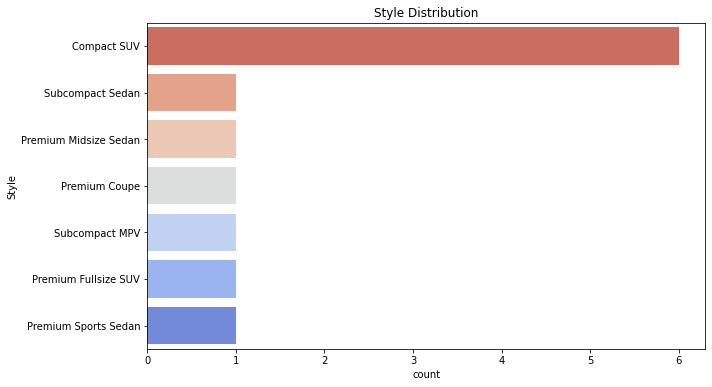

In [72]:
# con=style.index
# count_plot('Style',df,con,"Style Distribution")

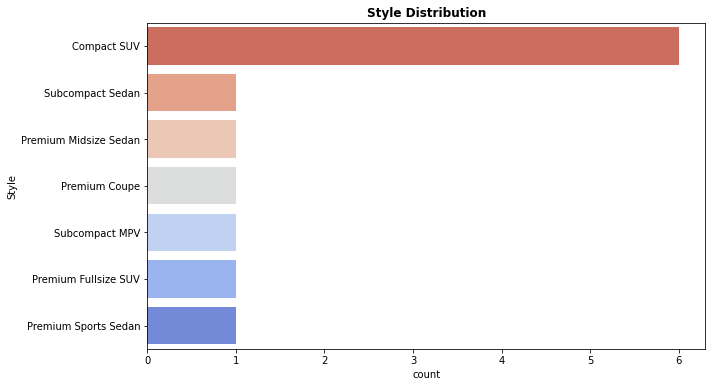

In [105]:
def count_plot(col,df,con,title):
    plt.figure(figsize=(10,6))
    sb.countplot(y='Style',data=df,order=con,palette='coolwarm_r')
    plt.title(title,{'fontweight':'bold','fontsize':'larger'})
    plt.show()
con=style.index
count_plot('Style',df,con,"Style Distribution")

In [66]:
range_style=df.groupby('Style')['Range(per Km)'].mean()

Text(0, 0.5, 'Range(per Km)')

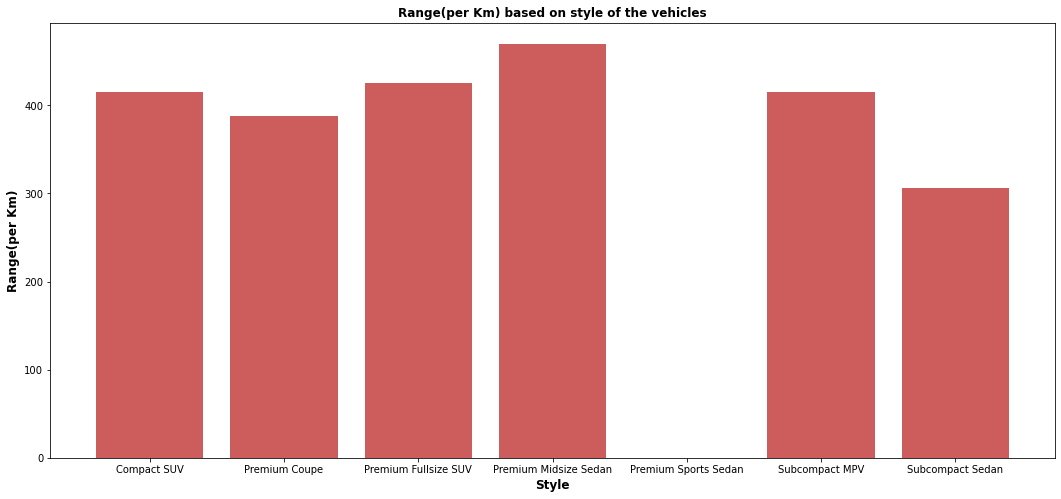

In [104]:
plt.figure(figsize=(18,8))
# sb.barplot(x=range_style.index,y=range_style.values)
# plt.barh(y=range_style.index,width=range_style.values,color='#CD5C5C')
plt.bar(x=range_style.index,height=range_style.values,color='#CD5C5C')
plt.title('Range(per Km) based on style of the vehicles',{'fontweight':'bold','fontsize':'larger'})
plt.xlabel("Style",{'fontweight':'bold','fontsize':'larger'})
plt.ylabel("Range(per Km)",{'fontweight':'bold','fontsize':'larger'})